In [1]:
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import tqdm
import seaborn as sns

# third-party imports
import numpy as np
import pandas as pd
import requests

# environment variables
from dotenv import load_dotenv
load_dotenv()
ANYDEALS_API_KEY = os.getenv("ANYDEAL_KEY")
# customisations - ensure tables show all columns
# pd.set_option("max_columns", 100)
print(ANYDEALS_API_KEY)

d0754faa36ea0d0d87c737908e13de1b56e857e5


In [51]:
df = pd.read_csv("price_items.csv")
df.head(10)

,Unnamed: 0,id,slug,title,type,mature,earlyAccess,achievements,tradingCards,appid,...,first_discount_date,last_discount,last_discount_date,discount_distribution,average_duration_between_discounts_12months,average_duration_of_discounts_12months,avg_price,avg_discount,next_discount,price_decay_rate
0,0,018d937f-19a5-7057-bb6d-314d586e6dbc,dota-2,Dota 2,game,False,False,False,True,570.0,...,2012-11-22,75.0,2012-12-31,"timestamp\n11 1\n12 3\nName: discount, d...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,018d937f-7851-7004-b780-3f657a301f9a,counter-strike-2,Counter-Strike 2,game,False,False,False,True,730.0,...,2012-11-01,50.0,2018-06-21,timestamp\n1 2\n2 2\n3 2\n6 ...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,018d937f-57ce-723f-b7e7-7c7b5df93471,pubg-battlegrounds,PUBG: BATTLEGROUNDS,game,False,False,True,False,578080.0,...,2018-06-19,50.0,2021-02-11,timestamp\n2 1\n4 1\n6 3\n7 2\...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,018d937f-50c1-7086-807c-e020c98c72b2,palworld,Palworld,game,False,False,True,False,1623730.0,...,2024-01-19,25.0,2024-06-27,timestamp\n1 1\n3 1\n4 1\n5 1\n6 ...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,018d937e-fde4-72ff-a7af-45e4955a8dd6,team-fortress-2,Team Fortress 2,game,False,False,True,True,440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,018d937f-0ddf-7119-9337-aa96d8a36d39,apex-legends,Apex Legends™,game,False,False,True,True,1172470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,018d937f-2f21-71cf-a59b-fbad13eddf95,new-world,New World,game,False,False,True,False,1063730.0,...,2021-11-24,60.0,2024-06-27,timestamp\n1 1\n3 2\n4 1\n5 1\...,NaN,NaN,NaN,NaN,NaN,NaN
7,7,018d983f-2710-722d-8efd-b8fc55b0ed23,call-of-duty--1,Call of Duty®,NaN,False,False,False,False,1938090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,018d937f-03e2-7281-a961-037a2d279a92,grand-theft-auto-v,Grand Theft Auto V,game,False,False,False,False,271590.0,...,2015-06-11,50.0,2020-12-22,timestamp\n1 1\n2 4\n3 5\n5 ...,NaN,NaN,NaN,NaN,NaN,NaN
9,9,018d937f-2404-7297-93fb-94b54bdb74e5,left-4-dead-2,Left 4 Dead 2,game,False,False,True,True,550.0,...,2012-10-25,90.0,2024-06-27,timestamp\n1 1\n2 3\n3 4\n5 ...,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['first_discount_date'] = pd.to_datetime(df['first_discount_date'])
df['first_available_date'] = pd.to_datetime(df['first_available_date'])

In [53]:
print(df[df['id'] == '018d937f-12d5-7136-98e9-8e3f63b2048d'].to_string())

    Unnamed: 0                                    id                  slug                  title  type  mature  earlyAccess  achievements  tradingCards     appid                                                                                 tags releaseDate                                                                                                                                                               developers                                                                          publishers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [54]:
df[df["first_available_price"].isna()]

,Unnamed: 0,id,slug,title,type,mature,earlyAccess,achievements,tradingCards,appid,...,first_discount_date,last_discount,last_discount_date,discount_distribution,average_duration_between_discounts_12months,average_duration_of_discounts_12months,avg_price,avg_discount,next_discount,price_decay_rate
4,4,018d937e-fde4-72ff-a7af-45e4955a8dd6,team-fortress-2,Team Fortress 2,game,False,False,True,True,440.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,018d937f-0ddf-7119-9337-aa96d8a36d39,apex-legends,Apex Legends™,game,False,False,True,True,1172470.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,018d983f-2710-722d-8efd-b8fc55b0ed23,call-of-duty--1,Call of Duty®,NaN,False,False,False,False,1938090.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,018d937f-50e3-70a2-9dc0-91a22a077ead,lost-ark,Lost Ark,game,False,False,True,False,1599340.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,018d937e-e9b4-730e-bfaf-ed97c23a2848,unturned,Unturned,game,False,False,True,True,304930.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2973,018d937f-179a-7363-8612-8361000c5606,haven,Haven,game,False,False,True,False,983970.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2949,2976,018d937f-440b-72ef-aee8-6df45dfe0e90,the-riftbreaker-prologue,The Riftbreaker: Prologue,game,False,False,False,False,1293860.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2952,2980,018d937f-29d3-7026-91ad-fd718b1e04da,amorous,Amorous,game,True,False,True,False,778700.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2962,2990,018d96f1-a1a9-70ec-9c8a-06ef9eb86465,occupy-mars-prologue-2020,Occupy Mars: Prologue (2020),game,False,False,False,False,1310520.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# if the first available price is missing, it means the item is always free

df.drop(df[df["first_available_price"].isna()].index, inplace=True)

In [56]:
df.shape

(2460, 38)

In [57]:
weird = df[df["first_available_date"] > df["releaseDate"]]
weird[["title", "releaseDate", "first_available_date"]]

,title,releaseDate,first_available_date
1,Counter-Strike 2,2012-08-21,2012-11-01
9,Left 4 Dead 2,2009-11-17,2012-10-25
17,Terraria,2011-05-16,2012-09-09
19,Garry's Mod,2006-11-29,2012-11-02
21,Tom Clancy's Rainbow Six® Siege,2015-01-05,2015-05-15
...,...,...,...
2945,Legacy of Kain: Defiance,2003-12-16,2012-12-20
2947,Blazblue Entropy Effect,2023-08-15,2024-02-14
2950,Iron Brigade,2012-08-13,2012-10-09
2958,"Planes, Bullets and Vodka",2016-12-13,2016-12-14


<Axes: xlabel='releaseDate', ylabel='Count'>

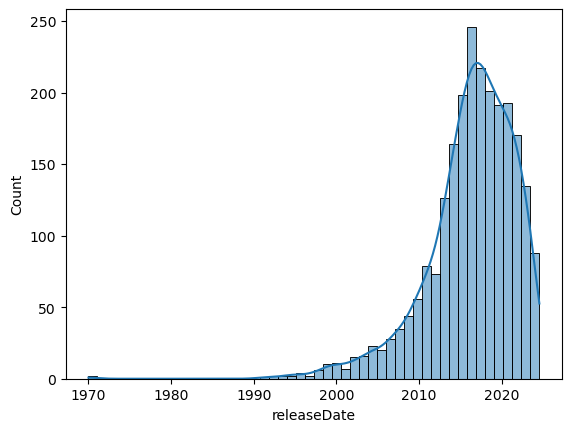

In [58]:
# histogram of the release dates
sns.histplot(
    df["releaseDate"], 
    bins=50,
    kde=True
    )

In [59]:
games_released_post2013 = df[df["releaseDate"] > "2013-01-01"]
games_released_post2013['length_before_discount'] = games_released_post2013['first_discount_date'] - games_released_post2013['first_available_date']
games_released_post2013.shape

/var/folders/7m/bpynmdb95w587ztb6nlzcgg80000gn/T/ipykernel_14246/3652085102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_released_post2013['length_before_discount'] = games_released_post2013['first_discount_date'] - games_released_post2013['first_available_date']


(1873, 39)

<Axes: xlabel='first_discount', ylabel='Count'>

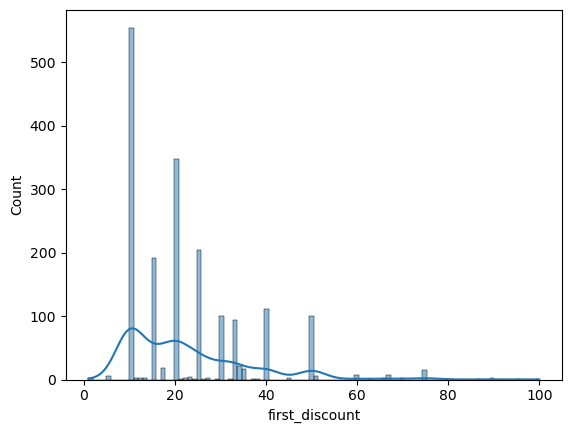

In [60]:
# histogram of the first discounted
sns.histplot(
    games_released_post2013["first_discount"],
    bins=100,
    kde=True
    )

In [61]:
games_released_post2013['length_before_discount'].describe()

count                           1843
mean      69 days 17:31:40.596852957
std      149 days 07:43:50.386504538
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                 98 days 00:00:00
max               2348 days 00:00:00
Name: length_before_discount, dtype: object

In [62]:
games_released_post2013[games_released_post2013['length_before_discount'] == dt.timedelta(days=0)]

,Unnamed: 0,id,slug,title,type,mature,earlyAccess,achievements,tradingCards,appid,...,last_discount,last_discount_date,discount_distribution,average_duration_between_discounts_12months,average_duration_of_discounts_12months,avg_price,avg_discount,next_discount,price_decay_rate,length_before_discount
0,0,018d937f-19a5-7057-bb6d-314d586e6dbc,dota-2,Dota 2,game,False,False,False,True,570.0,...,75.0,2012-12-31,"timestamp\n11 1\n12 3\nName: discount, d...",NaN,NaN,NaN,NaN,NaN,NaN,0 days
3,3,018d937f-50c1-7086-807c-e020c98c72b2,palworld,Palworld,game,False,False,True,False,1623730.0,...,25.0,2024-06-27,timestamp\n1 1\n3 1\n4 1\n5 1\n6 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
25,25,018d937f-12d5-7136-98e9-8e3f63b2048d,ark-survival-evolved,ARK: Survival Evolved,game,False,False,True,False,346110.0,...,75.0,2023-06-29,timestamp\n1 4\n2 5\n3 5\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
37,37,018d937e-fef7-7274-bbce-e7d155c3d2d1,dead-by-daylight,Dead by Daylight,game,False,False,True,True,381210.0,...,60.0,2024-07-25,timestamp\n1 5\n2 3\n3 7\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
38,38,018d937f-1212-7232-b23f-a046f6fd4a57,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,package,False,False,True,True,292030.0,...,90.0,2024-06-27,timestamp\n1 4\n2 8\n3 6\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,2985,018d937e-ea89-7344-9ac3-14d06c9f92ae,cosmic-dust-and-rust,Cosmic Dust & Rust,game,False,False,False,True,473560.0,...,50.0,2024-07-29,timestamp\n1 5\n2 3\n3 4\n4 5\...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2958,2986,018d937e-f976-721d-bebe-c2ab5833ff21,planes-bullets-and-vodka,"Planes, Bullets and Vodka",game,False,False,True,True,562360.0,...,51.0,2024-07-29,timestamp\n1 6\n2 11\n3 4\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2959,2987,018d937f-50ea-72a6-9112-a81e293c5e13,blacktail,BLACKTAIL,game,False,False,True,True,1532690.0,...,67.0,2024-06-27,timestamp\n1 1\n2 1\n3 3\n4 1\...,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2961,2989,018d937e-f973-71db-988b-4b9d2c183d55,battlefleet-gothic-armada,Battlefleet Gothic: Armada,game,False,False,True,True,363680.0,...,85.0,2024-06-27,timestamp\n1 5\n2 8\n3 6\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days


count    1873.000000
mean     1534.637480
std       855.395455
min         0.000000
25%       812.000000
50%      1559.000000
75%      2269.000000
max      2993.000000
Name: Unnamed: 0, dtype: float64

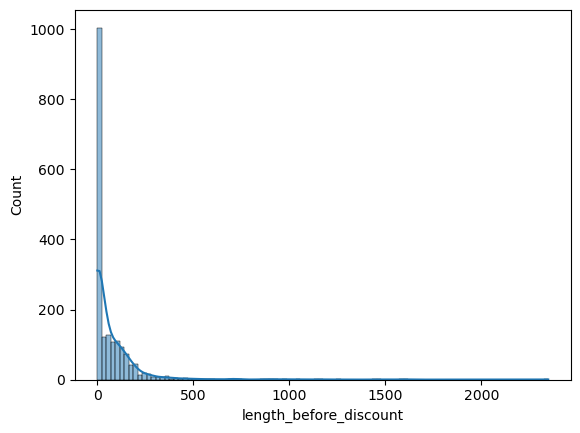

In [63]:
# histogram of the length before discount
temp = games_released_post2013[(games_released_post2013['length_before_discount'] != dt.timedelta(days=0)) & (games_released_post2013['length_before_discount'] <= dt.timedelta(days=1000))]
sns.histplot(
    # temp['length_before_discount'].dt.days,
    games_released_post2013['length_before_discount'].dt.days,
    bins=100,
    kde=True
    )

# temp['length_before_discount'].describe()
games_released_post2013['length_before_discount'].describe()
games_released_post2013['Unnamed: 0'].describe()

## Suspected Eearly Access Games

In [64]:
EA_games = games_released_post2013[games_released_post2013['first_available_date'] < games_released_post2013['releaseDate']]
not_EA_games = games_released_post2013[games_released_post2013['first_available_date'] >= games_released_post2013['releaseDate']]
EA_games.head(10)

,Unnamed: 0,id,slug,title,type,mature,earlyAccess,achievements,tradingCards,appid,...,last_discount,last_discount_date,discount_distribution,average_duration_between_discounts_12months,average_duration_of_discounts_12months,avg_price,avg_discount,next_discount,price_decay_rate,length_before_discount
0,0,018d937f-19a5-7057-bb6d-314d586e6dbc,dota-2,Dota 2,game,False,False,False,True,570.0,...,75.0,2012-12-31,"timestamp\n11 1\n12 3\nName: discount, d...",NaN,NaN,NaN,NaN,NaN,NaN,0 days
2,2,018d937f-57ce-723f-b7e7-7c7b5df93471,pubg-battlegrounds,PUBG: BATTLEGROUNDS,game,False,False,True,False,578080.0,...,50.0,2021-02-11,timestamp\n2 1\n4 1\n6 3\n7 2\...,NaN,NaN,NaN,NaN,NaN,NaN,452 days
6,6,018d937f-2f21-71cf-a59b-fbad13eddf95,new-world,New World,game,False,False,True,False,1063730.0,...,60.0,2024-06-27,timestamp\n1 1\n3 2\n4 1\n5 1\...,NaN,NaN,NaN,NaN,NaN,NaN,713 days
8,8,018d937f-03e2-7281-a961-037a2d279a92,grand-theft-auto-v,Grand Theft Auto V,game,False,False,False,False,271590.0,...,50.0,2020-12-22,timestamp\n1 1\n2 4\n3 5\n5 ...,NaN,NaN,NaN,NaN,NaN,NaN,145 days
10,10,018d937f-060f-705e-b364-8c5bba4d62f6,rust,Rust,game,False,False,True,True,252490.0,...,50.0,2024-07-15,timestamp\n1 3\n2 3\n3 3\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,711 days
14,14,018d937f-6ee4-73f5-858c-2fde3407462f,helldivers-2,HELLDIVERS 2,game,False,False,True,False,553850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
16,16,018d937f-590c-728b-ac35-38bcff85f086,elden-ring,Elden Ring,game,False,False,True,True,1245620.0,...,30.0,2024-06-27,timestamp\n6 2\n10 1\n12 2\nName: di...,NaN,NaN,NaN,NaN,NaN,NaN,413 days
18,18,018d937f-29ff-7103-a625-0aa533390c1c,brawlhalla,Brawlhalla,game,False,False,True,True,291550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
20,20,018d9584-24d6-7010-b82b-df1f0b154cc7,baldurs-gate-3,Baldur's Gate 3,game,False,False,True,False,1086940.0,...,20.0,2024-06-27,timestamp\n3 1\n5 1\n6 1\n12 1\...,NaN,NaN,NaN,NaN,NaN,NaN,1171 days
23,23,018d937f-1783-708b-b28f-086097dcd3da,wallpaper-engine,Wallpaper Engine,NaN,False,False,True,True,431960.0,...,10.0,2021-02-08,"timestamp\n2 1\nName: discount, dtype: int64",NaN,NaN,NaN,NaN,NaN,NaN,1581 days


<Axes: xlabel='length_before_discount', ylabel='Density'>

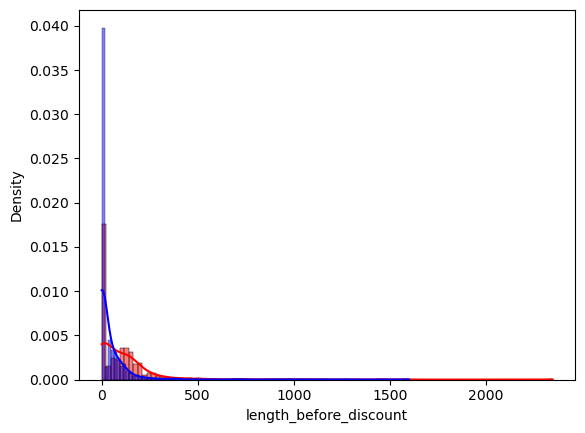

In [65]:
# histogram of the the length before discount for EA games and not EA games
sns.histplot(
    EA_games['length_before_discount'].dt.days,
    bins=100,
    kde=True,
    stat="density",
    color="red"
    )
sns.histplot(
    not_EA_games['length_before_discount'].dt.days,
    bins=100,
    kde=True,
    stat="density",
    color="blue"
    )

In [66]:
comparison = pd.DataFrame()
comparison["EA"] = EA_games['length_before_discount'].describe()
comparison["not EA"] = not_EA_games['length_before_discount'].describe()
comparison['EA_ranks'] = EA_games['Unnamed: 0'].describe()
comparison['not EA_ranks'] = not_EA_games['Unnamed: 0'].describe()

comparison

,EA,not EA,EA_ranks,not EA_ranks
count,772,1071,788.000000,1085.000000
mean,108 days 09:49:25.803108808,41 days 20:23:31.764705882,1332.440355,1681.486636
std,184 days 18:24:20.826275602,109 days 05:08:47.364456988,847.360485,831.267098
min,0 days 00:00:00,0 days 00:00:00,0.000000,3.000000
25%,0 days 00:00:00,0 days 00:00:00,571.750000,1001.000000
50%,70 days 00:00:00,0 days 00:00:00,1242.000000,1754.000000
75%,148 days 06:00:00,52 days 12:00:00,2000.500000,2404.000000
max,2348 days 00:00:00,1600 days 00:00:00,2992.000000,2993.000000


In [67]:
EA_games.loc[:,'possible_EA_duration'] = EA_games['releaseDate'] - EA_games['first_available_date']
EA_games['possible_EA_duration'].describe()

/var/folders/7m/bpynmdb95w587ztb6nlzcgg80000gn/T/ipykernel_14246/631531577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EA_games.loc[:,'possible_EA_duration'] = EA_games['releaseDate'] - EA_games['first_available_date']


count                            788
mean     284 days 20:55:25.888324872
std      457 days 15:12:53.894009496
min                  1 days 00:00:00
25%                 41 days 00:00:00
50%                101 days 12:00:00
75%                309 days 06:00:00
max               3894 days 00:00:00
Name: possible_EA_duration, dtype: object

<Axes: xlabel='possible_EA_duration', ylabel='Density'>

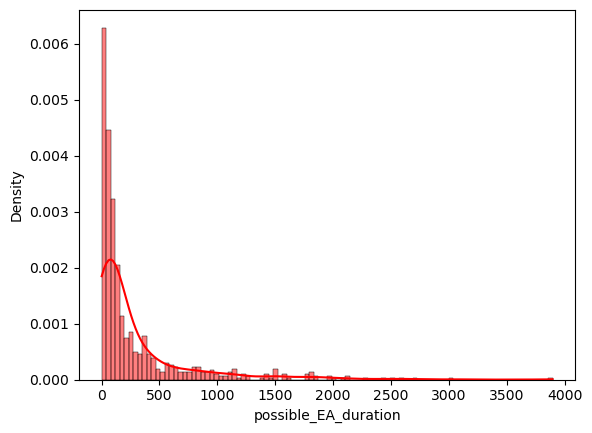

In [68]:
# histogram of the possible EA duration
sns.histplot(
    EA_games['possible_EA_duration'].dt.days,
    bins=100,
    kde=True,
    stat="density",
    color="red"
    )

In [69]:
EA_games[EA_games['possible_EA_duration'] <= dt.timedelta(days=30)]

,Unnamed: 0,id,slug,title,type,mature,earlyAccess,achievements,tradingCards,appid,...,last_discount_date,discount_distribution,average_duration_between_discounts_12months,average_duration_of_discounts_12months,avg_price,avg_discount,next_discount,price_decay_rate,length_before_discount,possible_EA_duration
28,28,018d937f-2947-726f-ab1e-7bf149096fff,payday-2,PAYDAY 2,game,False,False,True,True,218620.0,...,2024-07-15,timestamp\n1 6\n2 5\n3 5\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,75 days,9 days
36,36,018d937f-4640-728f-9dee-ff5702d93303,fall-guys,Fall Guys,game,False,False,True,False,1097150.0,...,2021-02-11,timestamp\n2 1\n11 1\n12 2\nName: di...,NaN,NaN,NaN,NaN,NaN,NaN,137 days,23 days
58,58,018d937e-fd94-7238-a99b-14457502670c,monster-hunter-world,Monster Hunter: World,game,False,False,True,True,582010.0,...,2024-06-27,timestamp\n1 4\n2 4\n3 2\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,87 days,30 days
84,84,018d937e-ff65-73f8-8d14-410ce85fa304,cities-skylines,Cities: Skylines,game,False,False,True,True,255710.0,...,2024-06-27,timestamp\n1 4\n2 10\n3 6\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,120 days,27 days
93,93,018d937e-f840-7073-871c-bd42fd7d4bdf,nba-2k20,NBA 2K20,game,False,False,True,False,1089350.0,...,2020-08-18,timestamp\n1 1\n2 1\n3 2\n5 1\...,NaN,NaN,NaN,NaN,NaN,NaN,62 days,17 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2866,018d937f-1b07-7082-b6dc-631d06af0ddd,bound-by-flame,Bound By Flame,game,False,False,True,True,243930.0,...,2024-06-27,timestamp\n1 4\n2 6\n3 3\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days,15 days
2860,2886,018d937f-1981-7124-9934-c099cd14f97e,metal-gear-survive,Metal Gear Survive,game,False,False,True,False,543900.0,...,2024-06-27,timestamp\n1 3\n2 2\n3 2\n4 5\...,NaN,NaN,NaN,NaN,NaN,NaN,156 days,13 days
2866,2892,018d937e-f849-700a-9462-5166d1c08f96,oddworld-new-n-tasty,Oddworld: New 'n' Tasty,game,False,False,True,True,314660.0,...,2024-06-27,timestamp\n1 2\n2 4\n3 2\n4 ...,NaN,NaN,NaN,NaN,NaN,NaN,0 days,23 days
2927,2954,018d937f-5c47-73f7-b047-1e436148ec4a,serious-sam-siberian-mayhem,Serious Sam: Siberian Mayhem,game,False,False,True,True,1792250.0,...,2024-06-27,timestamp\n1 3\n2 1\n3 2\n4 2\...,NaN,NaN,NaN,NaN,NaN,NaN,0 days,15 days
